<a href="https://colab.research.google.com/github/DrNelsonJatel/Testing-Social-Network-Metrics/blob/main/synthetic_script_1.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Saved dataset to CSV & Excel.


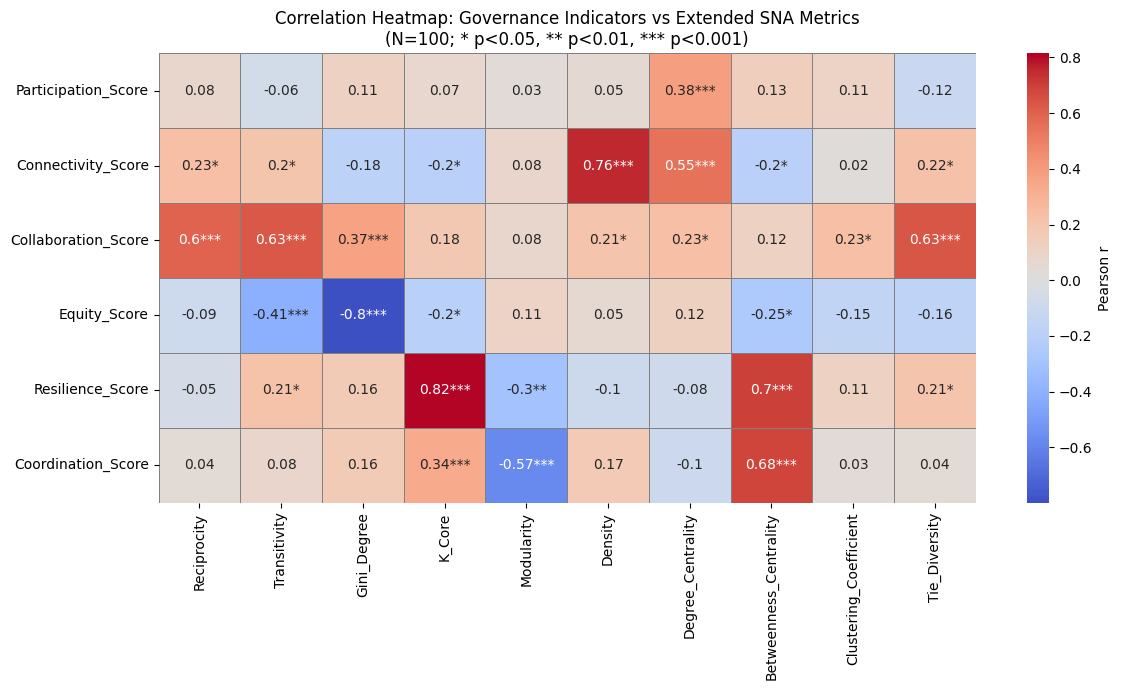

✅ Plotted correlation heatmap and saved PNG.
✅ Saved summary & correlation matrix to Excel.


/tmp/ipython-input-2-707329453.py:122: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.08' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  corr_export.loc[g, s] = f"{corr_values.loc[g, s]:.2f}{significance_stars(p_values.loc[g, s])}"
/tmp/ipython-input-2-707329453.py:122: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.06' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  corr_export.loc[g, s] = f"{corr_values.loc[g, s]:.2f}{significance_stars(p_values.loc[g, s])}"
/tmp/ipython-input-2-707329453.py:122: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.11' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  corr_export.lo

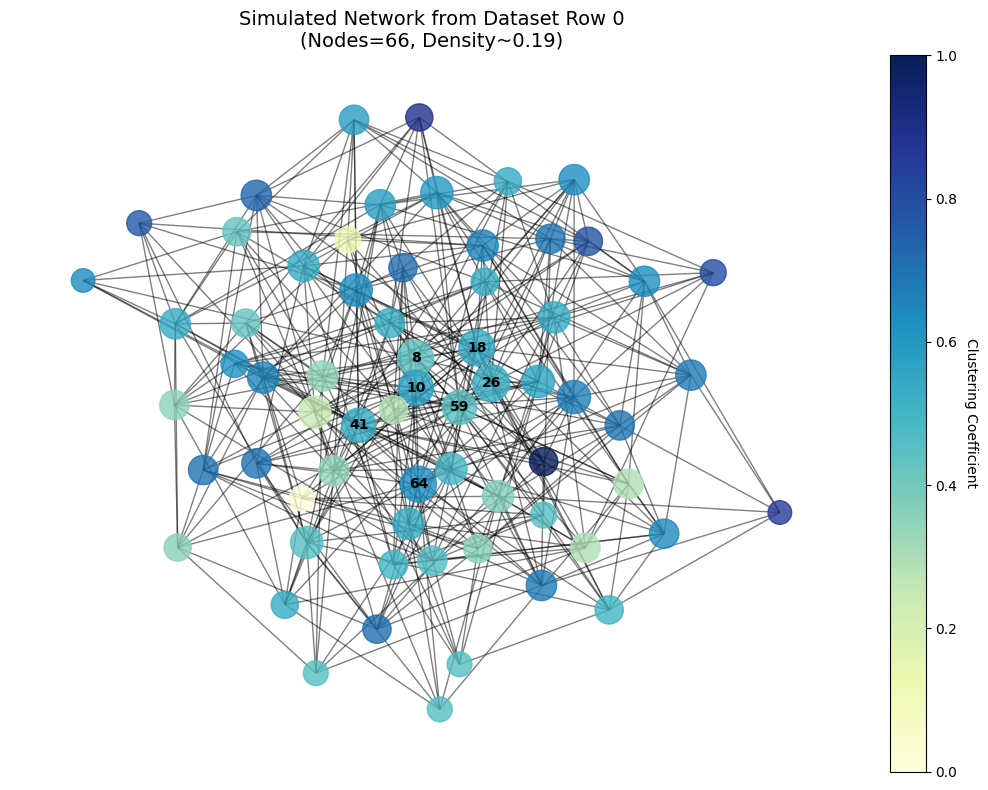

✅ Created network map tied to dataset and saved PNG.
📊 Estimated power to detect r=0.5 at n=100: 0.99


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
from scipy.stats import pearsonr

# ---------------------------
# FIXED SEED FOR FULL REPRODUCIBILITY
# ---------------------------
np.random.seed(42)

# ---------------------------
# PARAMETERS
# ---------------------------
num_networks = 100

# ---------------------------
# GENERATE GOVERNANCE SCORES
# ---------------------------
means = [3,3,3,3,3,3]
target_corr = np.array([
    [1.0, 0.5, 0.3, 0.0, 0.0, 0.0],
    [0.5, 1.0, 0.4, 0.0, 0.0, 0.0],
    [0.3, 0.4, 1.0,-0.5, 0.3, 0.0],
    [0.0, 0.0,-0.5, 1.0, 0.0, 0.0],
    [0.0, 0.0, 0.3, 0.0, 1.0, 0.5],
    [0.0, 0.0, 0.0, 0.0, 0.5, 1.0]
])
cov_matrix = target_corr * np.outer(np.ones(6), np.ones(6))
data = np.random.multivariate_normal(means, cov_matrix, size=num_networks)
df = pd.DataFrame(data, columns=[
    "Participation_Score","Connectivity_Score","Collaboration_Score",
    "Equity_Score","Resilience_Score","Coordination_Score"
])
for col in df.columns:
    df[col] = df[col].clip(1,5)

# ---------------------------
# ADD VARIABLE NETWORK SIZE
# ---------------------------
df["Num_Nodes"] = np.random.randint(20,80,num_networks)
df["Participation_Score"] = np.clip(1 + 0.03*df["Num_Nodes"] + np.random.normal(0,0.5,num_networks), 1,5)

# ---------------------------
# NETWORK METRICS + EXTENDED METRICS
# ---------------------------
df["Reciprocity"] = np.clip(0.2 + 0.15*df["Collaboration_Score"] + np.random.normal(0,0.2,num_networks), 0, 1)
df["Transitivity"] = np.clip(0.3 + 0.12*df["Collaboration_Score"] + np.random.normal(0,0.2,num_networks), 0, 1)
df["Gini_Degree"] = np.clip(0.8 - 0.15*df["Equity_Score"] + np.random.normal(0,0.1,num_networks), 0.2, 0.9)
df["K_Core"] = np.clip(1 + 0.8*df["Resilience_Score"] + np.random.normal(0,0.5,num_networks), 1,5)
df["Modularity"] = np.clip(0.6 - 0.1*df["Coordination_Score"] + np.random.normal(0,0.1,num_networks), 0.2,0.8)
df["Density"] = np.clip(0.1 + 0.03*df["Connectivity_Score"] + np.random.normal(0,0.02,num_networks), 0.05,0.3)

df["Degree_Centrality"] = np.clip(0.3 + 0.1*df["Participation_Score"] + 0.1*df["Connectivity_Score"]
                                  + np.random.normal(0,0.1,num_networks), 0,1)
df["Betweenness_Centrality"] = np.clip(0.2 + 0.1*df["Coordination_Score"] + 0.1*df["Resilience_Score"]
                                       + np.random.normal(0,0.1,num_networks), 0,1)
df["Clustering_Coefficient"] = np.clip(0.3 + 0.15*df["Transitivity"] + 0.15*df["Reciprocity"]
                                       + np.random.normal(0,0.1,num_networks), 0,1)
df["Tie_Diversity"] = np.clip(0.4 + 0.1*df["Collaboration_Score"] - 0.05*df["Gini_Degree"]
                              + np.random.normal(0,0.1,num_networks), 0,1)

# ---------------------------
# SAVE DATASET TO CSV & EXCEL
# ---------------------------
df.to_csv("final_extended_synthetic_governance_dataset.csv", index=False)
df.to_excel("final_extended_synthetic_governance_dataset.xlsx", index=False)
print("✅ Saved dataset to CSV & Excel.")

# ---------------------------
# CORRELATION: GOVERNANCE vs EXTENDED SNA
# ---------------------------
governance_cols = ["Participation_Score","Connectivity_Score","Collaboration_Score",
                   "Equity_Score","Resilience_Score","Coordination_Score"]
sna_metrics_cols = ["Reciprocity","Transitivity","Gini_Degree","K_Core","Modularity","Density",
                    "Degree_Centrality","Betweenness_Centrality","Clustering_Coefficient","Tie_Diversity"]

corr_values = pd.DataFrame(index=governance_cols, columns=sna_metrics_cols, dtype=float)
p_values = pd.DataFrame(index=governance_cols, columns=sna_metrics_cols, dtype=float)

for g in governance_cols:
    for s in sna_metrics_cols:
        r, p = pearsonr(df[g], df[s])
        corr_values.loc[g, s] = r
        p_values.loc[g, s] = p

def significance_stars(p):
    if p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    else:
        return ''

annot = corr_values.round(2).astype(str)
for g in governance_cols:
    for s in sna_metrics_cols:
        annot.loc[g, s] += significance_stars(p_values.loc[g, s])

# ---------------------------
# PLOT CORRELATION HEATMAP
# ---------------------------
plt.figure(figsize=(12,7))
sns.heatmap(corr_values, annot=annot, fmt='', cmap='coolwarm', center=0,
            cbar_kws={'label': 'Pearson r'}, linewidths=0.5, linecolor='gray')
plt.title("Correlation Heatmap: Governance Indicators vs Extended SNA Metrics\n"
          "(N=100; * p<0.05, ** p<0.01, *** p<0.001)", fontsize=12)
plt.tight_layout()
plt.savefig("correlation_heatmap_governance_vs_extended_sna.png", dpi=300)
plt.show()
print("✅ Plotted correlation heatmap and saved PNG.")

# ---------------------------
# SAVE SUMMARY + CORRELATIONS TO EXCEL
# ---------------------------
corr_export = corr_values.copy()
for g in governance_cols:
    for s in sna_metrics_cols:
        corr_export.loc[g, s] = f"{corr_values.loc[g, s]:.2f}{significance_stars(p_values.loc[g, s])}"

with pd.ExcelWriter("correlations_and_summary.xlsx") as writer:
    df.describe().T[['mean','std','min','max']].to_excel(writer, sheet_name="Summary Stats")
    corr_export.to_excel(writer, sheet_name="Governance vs SNA Correlations")
print("✅ Saved summary & correlation matrix to Excel.")

# ---------------------------
# BUILD NETWORK FROM FIRST SYNTHETIC NETWORK
# ---------------------------
selected_network = df.iloc[0]
num_nodes = int(selected_network["Num_Nodes"])
target_density = selected_network["Density"]

# Generate network with this num_nodes & approximate density
G = nx.erdos_renyi_graph(num_nodes, target_density, seed=42)

# Compute node metrics
degree_dict = dict(G.degree())
betweenness_dict = nx.betweenness_centrality(G)
clustering_dict = nx.clustering(G)

node_sizes = [100 + 600*degree_dict[n]/max(degree_dict.values()) if max(degree_dict.values()) > 0 else 100 for n in G.nodes()]
node_colors = [clustering_dict[n] for n in G.nodes()]
labels = {n:str(n) for n in G.nodes()
          if degree_dict[n] > np.percentile(list(degree_dict.values()), 90)
          or betweenness_dict[n] > np.percentile(list(betweenness_dict.values()), 90)}

plt.figure(figsize=(10,8))
pos = nx.spring_layout(G, seed=42)
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors,
                               cmap='YlGnBu', alpha=0.8)
edges = nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, labels, font_size=10, font_weight='bold')

cbar = plt.colorbar(plt.cm.ScalarMappable(cmap='YlGnBu'),
                    ax=plt.gca(), orientation='vertical', fraction=0.046, pad=0.04)
cbar.set_label('Clustering Coefficient', rotation=270, labelpad=15)
plt.title(f"Simulated Network from Dataset Row 0\n"
          f"(Nodes={num_nodes}, Density~{target_density:.2f})", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.savefig("simulated_network_from_dataset.png", dpi=300)
plt.show()
print("✅ Created network map tied to dataset and saved PNG.")

# ---------------------------
# QUICK POWER SIMULATION
# ---------------------------
power = []
for _ in range(1000):
    x = np.random.normal(0,1,100)
    y = 0.5*x + np.random.normal(0,1,100)
    r,p = pearsonr(x,y)
    power.append(p<0.05)
print(f"📊 Estimated power to detect r=0.5 at n=100: {np.mean(power):.2f}")
